In [115]:
import os
import pandas as pd

In [116]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydenni.csv"))
df['week'] = df.apply(lambda x: f"""{x['rok']}-{x['tyden']}""", axis = 1)
df = df[df['rok'] >= 2015]

In [117]:
def nejmensispolecny(x):
    x = x.lower().split('(')[0]
    if x[0:3] == "the":
        x = x.replace("the ","")
    return x

In [118]:
df['track'] = df['track'].apply(lambda x: nejmensispolecny(x))
df['interpret_hlavni'] = df['interpret_hlavni'].apply(lambda x: nejmensispolecny(x))

In [119]:
stream = pd.read_csv(os.path.join("data","CZ_SINGLES_DIGITAL_TOP_100_tydenni.csv"))
stream = stream[stream['rok'] >= 2015]
stream['week'] = stream.apply(lambda x: f"""{x['rok']}-{x['tyden']}""", axis = 1)

In [120]:
stream['track'] = stream['track'].apply(lambda x: nejmensispolecny(x))
stream['interpret_hlavni'] = stream['interpret_hlavni'].apply(lambda x: nejmensispolecny(x))

In [121]:
df['w'] = df['week'].rank(method='dense').astype(int)

In [122]:
df

,Unnamed: 0,hitparada,rok,tyden,week,pozice,track,interpret,interpret_hlavni,vydavatel,w
45900,46000,CZ - RADIO - TOP 100,2015,1,2015-1,1,víno,Chinaski,chinaski,Brainzone,1
45901,46001,CZ - RADIO - TOP 100,2015,1,2015-1,2,geronimo,Sheppard,sheppard,Universal Music,1
45902,46002,CZ - RADIO - TOP 100,2015,1,2015-1,3,shower,Becky G,becky g,Sony Music,1
45903,46003,CZ - RADIO - TOP 100,2015,1,2015-1,4,when the beat drops out,Marlon Roudette,marlon roudette,Universal Music,1
45904,46004,CZ - RADIO - TOP 100,2015,1,2015-1,5,take me to church,Hozier,hozier,Universal Music,1
...,...,...,...,...,...,...,...,...,...,...,...
90595,96695,CZ - RADIO - TOP 100,2023,39,2023-39,96,happy,Nf,nf,Universal Music,440
90596,96696,CZ - RADIO - TOP 100,2023,39,2023-39,97,one & only,Oliver Tree,oliver tree,Warner Music,440
90597,96697,CZ - RADIO - TOP 100,2023,39,2023-39,98,gravity,Twocolors & Ásdís,twocolors,Universal Music,440
90598,96698,CZ - RADIO - TOP 100,2023,39,2023-39,99,runaway,P!Nk,p!nk,Sony Music,440


In [123]:
stream['w'] = stream['week'].rank(method='dense').astype(int)

In [124]:
stream

,Unnamed: 0,hitparada,rok,tyden,week,pozice,track,interpret,interpret_hlavni,vydavatel,w
3000,3100,CZ - SINGLES DIGITAL - TOP 100,2015,1,2015-1,1,take me to church,Hozier,hozier,Universal Music,1
3001,3101,CZ - SINGLES DIGITAL - TOP 100,2015,1,2015-1,2,thinking out loud,Ed Sheeran,ed sheeran,Warner Music,1
3002,3102,CZ - SINGLES DIGITAL - TOP 100,2015,1,2015-1,3,outside,Calvin Harris Feat. Ellie Goulding,calvin harris,Sony Music,1
3003,3103,CZ - SINGLES DIGITAL - TOP 100,2015,1,2015-1,4,uptown funk,Mark Ronson Feat. Bruno Mars,mark ronson,Sony Music,1
3004,3104,CZ - SINGLES DIGITAL - TOP 100,2015,1,2015-1,5,prayer in c,Lilly Wood & The Prick And Robin Schulz,lilly wood,Warner Music,1
...,...,...,...,...,...,...,...,...,...,...,...
47695,54195,CZ - SINGLES DIGITAL - TOP 100,2023,39,2023-39,96,silent kill,P T K,p t k,Nan,440
47696,54196,CZ - SINGLES DIGITAL - TOP 100,2023,39,2023-39,97,prcvl,Yzomandias,yzomandias,Milion+ Ent./Universal Music,440
47697,54197,CZ - SINGLES DIGITAL - TOP 100,2023,39,2023-39,98,bad idea right?,Olivia Rodrigo,olivia rodrigo,Universal Music,440
47698,54198,CZ - SINGLES DIGITAL - TOP 100,2023,39,2023-39,99,vitej,Vadak,vadak,Vadim Tkachenko,440


## Porovnání písní: která bodovala dřív online (-) a která v rádiu (+)

In [125]:
jednicky_radio = df[df['pozice'] == 1].groupby(['interpret_hlavni','track'])['w'].min()

In [126]:
jednicky_stream = stream[stream['pozice'] == 1].groupby(['interpret_hlavni','track'])['w'].min()

In [127]:
jednicky_stream

interpret_hlavni  track         
24kgoldn          mood              286
6ix9ine           gooba             267
adele             easy on me        343
                  hello              39
alan walker       faded              60
                                   ... 
yzomandias        designer flow     296
                  free karlo        398
                  rodinnej typ      354
                  rolls             282
zayn              dusk till dawn    140
Name: w, Length: 94, dtype: int32

In [128]:
(jednicky_stream - jednicky_radio).dropna().sort_values().head()

interpret_hlavni   track            
imagine dragons    bad liar            -53.0
hozier             take me to church   -33.0
twenty one pilots  heathens            -15.0
ed sheeran         i don't care        -13.0
shawn mendes       senorita            -12.0
Name: w, dtype: float64

In [129]:
(jednicky_stream - jednicky_radio).dropna().sort_values().tail()

interpret_hlavni  track              
justin bieber     love yourself          -1.0
ed sheeran        shape of you            0.0
alan walker       faded                   0.0
ellie goulding    love me like you do     0.0
ava max           sweet but psycho       11.0
Name: w, dtype: float64

In [130]:
(jednicky_stream - jednicky_radio).dropna().mean()

-9.666666666666666

In [131]:
dodeseti_radio = df[df['pozice'] <= 10].groupby(['interpret_hlavni','track'])['w'].min()
dodeseti_stream = stream[stream['pozice'] <= 10].groupby(['interpret_hlavni','track'])['w'].min()
(dodeseti_stream - dodeseti_radio).dropna().sort_values()

interpret_hlavni  track               
ed sheeran        happier                -87.0
sam smith         too good at goodbyes   -67.0
shawn mendes      stitches               -61.0
justin bieber     sorry                  -58.0
billie eilish     therefore i am         -58.0
                                          ... 
julia michaels    issues                  28.0
alan walker       alone                   31.0
ofenbach          katchi                  38.0
sheppard          geronimo                44.0
david guetta      dangerous               44.0
Name: w, Length: 167, dtype: float64

In [132]:
(dodeseti_stream - dodeseti_radio).dropna().mean()

-9.479041916167665

In [133]:
(dodeseti_stream - dodeseti_radio).dropna().median()

-9.0

In [134]:
dosta_radio = df[df['pozice'] <= 100].groupby(['interpret_hlavni','track'])['w'].min()
dosta_stream = stream[stream['pozice'] <= 100].groupby(['interpret_hlavni','track'])['w'].min()
(dosta_stream - dosta_radio).dropna().sort_values()

interpret_hlavni  track                    
taylor swift      cruel summer                -204.0
jubel             dancing in the moonlight    -103.0
martin garrix     high on life                 -98.0
ed sheeran        happier                      -69.0
p!nk              just give me a reason        -65.0
                                               ...  
coldplay          viva la vida                 263.0
olga lounová      jsem optimista               313.0
jelen             magdaléna                    363.0
kabát             western boogie               378.0
amy macdonald     this is the life             411.0
Name: w, Length: 873, dtype: float64

In [135]:
(dosta_stream - dosta_radio).dropna().mean()

-1.1420389461626574

In [136]:
(dosta_stream - dosta_radio).dropna().median()

-4.0

Polovina písniček je o 4 týdny nebo více dřív populární online než v rádiu.

## Vývoj v čase?

In [137]:
rozdily = pd.DataFrame((dosta_stream - dosta_radio).dropna().sort_values()).rename(columns={'w': 'rozdil'})

In [138]:
rozdily

,,rozdil
interpret_hlavni,track,
taylor swift,cruel summer,-204.0
jubel,dancing in the moonlight,-103.0
martin garrix,high on life,-98.0
ed sheeran,happier,-69.0
p!nk,just give me a reason,-65.0
...,...,...
coldplay,viva la vida,263.0
olga lounová,jsem optimista,313.0
jelen,magdaléna,363.0


In [139]:
poprve_vysilana = pd.DataFrame(df.groupby(['interpret_hlavni','track'])['rok'].min())

In [140]:
poprve_vysilana

rok
interpret_hlavni track                    
24kgoldn         bite                 2023
                 mood                 2020
                 more than friends    2022
2choice          reasons to love you  2018
2kbaby           like this            2021
...                                    ...
zhu              faded                2015
zoe wees         control              2020
                 girls like us        2021
                 third wheel          2022
zoči voči        romantik             2016

[2332 rows x 1 columns]

In [141]:
poprve_vysilana = poprve_vysilana.merge(rozdily, left_index=True, right_index=True, how = 'outer')

In [142]:
poprve_vysilana

rok  rozdil
interpret_hlavni track                            
24kgoldn         bite                 2023     NaN
                 mood                 2020   -14.0
                 more than friends    2022     NaN
2choice          reasons to love you  2018     NaN
2kbaby           like this            2021     NaN
...                                    ...     ...
zhu              faded                2015     NaN
zoe wees         control              2020     NaN
                 girls like us        2021     NaN
                 third wheel          2022     NaN
zoči voči        romantik             2016     NaN

[2332 rows x 2 columns]

<Axes: xlabel='rok'>

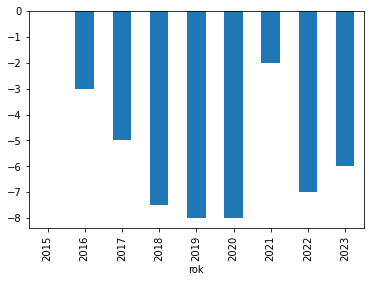

In [143]:
poprve_vysilana.groupby('rok')['rozdil'].median().plot.bar()

Tohle asi žádnej příběh nevypráví + nejsem si jistej, zda je ten výpočet metodologicky ok.